## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with Consumer Complaint Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


The consumer complaint dataset comprises around 5000 complaints on six products.

In [2]:
# Read the csv file consumer_complaints.csv
mydata_train = pd.read_csv("C:\\Datasets\\consumer_complaints.csv")

In [3]:
# Print the product groups in the dataset
print(list(mydata_train.Product))

['Credit card or prepaid card', 'Mortgage', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Vehicle loan or lease', 'Debt collection', 'Debt collection', 'Mortgage', 'Vehicle loan or lease', 'Mortgage', 'Credit card or prepaid card', 'Checking or savings account', 'Credit card or prepaid card', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Mortgage', 'Mortgage', 'Student loan', 'Mortgage', 'Mortgage', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Credit card or prepaid card', 'Mortgage', 'Mortgage', 'Credit card or prepaid card', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Checking or savings account', 'Debt collection', 'Debt collection', 'Vehicle loan or lease', 'Student loan', 'Vehicle loan or lease', 'Debt collection', 'Checking or savings account', 'Debt collection', 'Debt collection', 'Student loan', 'Student loan', 'Mortgage', 'Checking or savings account', 'Student loan', 'Vehicle loan or l

In [4]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Check the length of the data
print(len(mydata_train.Product))
print(len(mydata_train.Consumer_complaint_narrative))


5000
5000


### Expected Output: 
5000

5000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [6]:
text = mydata_train.Consumer_complaint_narrative


## Preprocessing the Corpus

In [7]:
# Preprocessing the data

lines = [] 
word_list = [] 
 
for line in text:
    #tokenize the text documents and update the lists word_list and lines
    line = line.lower()
    line = word_tokenize(line)
    
    line = [i for i in line if i.isalpha()]
    
    lines.append(line) 
    
    for word in line:
        word_list.append(word)


# Make sure the word_list contains unique tokens
word_list = list(set(word_list))

# Calculate the total documents present in the corpus
total_docs = len(lines)
 
#Create a dictionary to keep track of index of each word
dict_idx = {key: val for val, key in enumerate(word_list)}

In [8]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word={}
    for word in word_list: 
            cnt = 0
            for row in lines:
                if word in row:
                    cnt+=1 
            freq_word[word]=cnt

    return freq_word


In [9]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'cks': 1,
 'satisfaction': 16,
 'standalone': 1,
 'vacation': 25,
 'fourth': 16,
 'couldve': 3,
 'maturity': 10,
 'es': 1,
 'instructing': 7,
 'cirscuntaces': 1,
 'engage': 5,
 'enforced': 2,
 'subterfuge': 6,
 'since': 975,
 'ebay': 2,
 'beginning': 119,
 'downpayment': 5,
 'vance': 1,
 'ball': 9,
 'package': 44,
 'means': 104,
 'ignores': 4,
 'appealed': 12,
 'profanity': 4,
 'duplicating': 2,
 'objections': 5,
 'depicts': 2,
 'foreigners': 2,
 'criminal': 47,
 'garnering': 1,
 'oppressive': 1,
 'declaring': 7,
 'tanking': 1,
 'aggregate': 1,
 'garnish': 27,
 'vet': 8,
 'phonexxxx': 1,
 'safety': 14,
 'pulled': 58,
 'mislead': 24,
 'stays': 4,
 'infamous': 3,
 'sate': 1,
 'friends': 20,
 'urgency': 3,
 'questionably': 1,
 'calendar': 19,
 'thesis': 1,
 'corrected': 84,
 'annoyed': 4,
 'reminders': 2,
 'inefficient': 3,
 'component': 1,
 'continually': 28,
 'nguyen': 1,
 'actioning': 1,
 'creative': 1,
 'leapt': 1,
 'pursuit': 3,
 'b': 104,
 'description': 29,
 'pertain': 2,
 'corres

In [10]:
import pickle 

with open('freq_word.pickle', 'wb') as f:
    pickle.dump(freq_word, f)


In [11]:
with open('freq_word.pickle', 'rb') as f:
    freq_word = pickle.load(f)

In [12]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    occurance = len([token for token in document if token == word])
    tf = occurance/len(document)
    
    return tf

In [13]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    try:
        word_occurance = freq_word[word] + 1
    except:
        word_occurance = 1

    idf = np.log(total_docs/word_occurance)

    return idf



In [14]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(word_list),))
    for word in sentence:
        tf = term_frequency(sentence,word)
        idf = inverse_df(word)
        value = tf*idf
        tf_idf_vec[dict_idx[word]] = value

    return tf_idf_vec
    

In [15]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

vectors = []
for sent in lines:
    vec = tfidf(sent, dict_idx)
    vectors.append(vec)

## Multinomial Naive Bayes (10 Points)

In [16]:
#Fit a Multinomial Naive Bayes Model on our dataset

model = MultinomialNB(alpha=0.01).fit(vectors, mydata_train.Product)



In [17]:
#Perform testing on the train dataset

pred = model.predict(vectors)

In [18]:
#Calculate the F1 Score and the Accuracy

F1_score = metrics.f1_score(mydata_train.Product, pred, average='micro') 
Accuracy = metrics.accuracy_score(mydata_train.Product, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.826
Accuracy:  0.826


### Expected Output:
F1 Score: 0.8081311697005633

Accuracy: 0.826

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [19]:
# install libraries
#pip install wikipedia
%pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [20]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["Cancer", "Melanoma", "Asthama", "Diabetes", "AIDS",
          "Data Science","Natural language processing", "Machine learning", "Artificial intelligence",
           "Cricket", "Football", "Chess","Table Tennis","Swimming",
          "Music", "Guitar", "Piano", "Flute"]

# list of articles to be downloaded
articles = ['Diabetes',
 'Type 2 diabetes',
 'Type 1 diabetes',
 'Gestational diabetes',
 'Cancer',
 'Breast cancer',
 'Colorectal cancer',
 'Pancreatic cancer',
 'HIV/AIDS',
 'AIDS (disambiguation)',
 'Timeline of HIV/AIDS',
 'History of HIV/AIDS',
 'Data science',
 'Data',
 'Data analysis',
 'Data type',
 'Natural language processing',
 'Outline of natural language processing',
 'Natural-language understanding',
 'Natural Language Toolkit',
 'Artificial intelligence',
 'Artificial general intelligence',
 'History of artificial intelligence',
 'Applications of artificial intelligence',
 'Explainable artificial intelligence', 
 'Football',
 'Australian rules football',
 'American football',
 'English Football League', 
 'Cricket',
 'Glossary of cricket terms',
 'Cricket World Cup',
 'Melbourne Cricket Ground',     
 'Hockey',
 'Ice hockey',
 'National Hockey League',
 'Field hockey',        
 'Guitar',
 'Electric guitar',
 'Bass guitar',
 'Music',
 'Flute',
 'Western concert flute',
 'Transverse flute',
 'The Magic Flute',

 ]


# download and store articles (summaries) in this variable
data = []
for article in articles:
    try:
        p = wikipedia.summary(article)
    except:
        pass
    data.append(p)
    

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 

I chose to clean data, before using tfidf to get vectors from the text. I have also shown the t-sne plots without cleaning data. We can see that t-sne plot of cleaned data performs little better but there is not much difference between the plots. T-sne perfoms quite well without cleaning the data as well.

Theoritically, we can see that cleaning data will definitely help to reduce words with similar semantic meaning for eg. work and working. Hence dimensionality of data will reduce if vocabulary is reduced.

On the other hand, T-sne performs good with high dimensional data. Hence it will place the words 'work' and 'working' close in lower dimension, even if they are present in corpus (without cleaning data). hence we see that t-sne will perform similar even if data is not cleaned.

In [21]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_message(review):
  '''
  Input:
      review: a string containing a review.
  Output:
      review_cleaned: a processed review. 
  '''
  
  # convert to lower case
  review = review.lower()

  # removing links
  review = re.sub(r'https?://\S+', '', review)

  # removing punctuations
  review = re.sub('[^\w\s]','',review)

  # tokenizing words
  review = word_tokenize(review)
  
  # remove stopwords
  
  review = [i for i in review if i not in stopwords]

  #lemmatizing
  review = [lemmatizer.lemmatize(w) for w in review]
    
  
  return ' '.join(review)


clean_data = []
for document in data:
    clean_data.append(clean_message(document))



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_data)


In [23]:
print(X.shape)

(45, 2665)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [24]:
 from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(n_components=2, verbose=1, random_state=27)
Xt = tsne.fit_transform(X)

[t-SNE] Computing 44 nearest neighbors...
[t-SNE] Indexed 45 samples in 0.001s...
[t-SNE] Computed neighbors for 45 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 45 / 45
[t-SNE] Mean sigma: 0.491189
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.929707
[t-SNE] KL divergence after 1000 iterations: 0.339591


Plot and annotate the points with different markers for different expected groups.

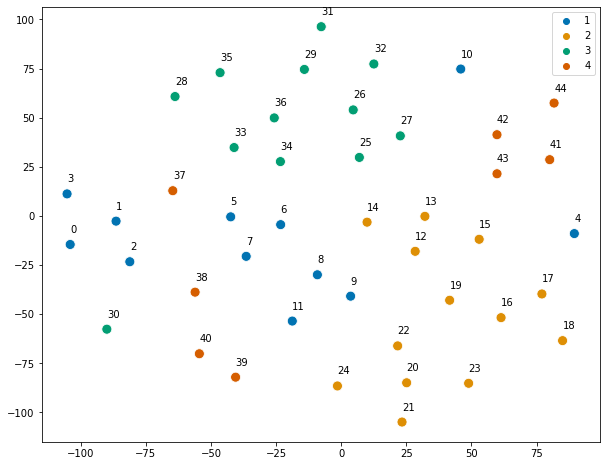

In [25]:
import matplotlib.pyplot as plt

import seaborn as sns

fig,ax = plt.subplots(figsize=(10,8))

hue = [1] * 12 + [2] * 13 + [3] * 12 + [4] * 8

sns.scatterplot(Xt[:,0], Xt[:,1], data=Xt, hue = hue, palette="colorblind", s=100)
for i, val in enumerate(Xt):
    plt.annotate(i, (val[0], val[1] + 6))

[t-SNE] Computing 44 nearest neighbors...
[t-SNE] Indexed 45 samples in 0.000s...
[t-SNE] Computed neighbors for 45 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 45 / 45
[t-SNE] Mean sigma: 0.506495
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.049419
[t-SNE] KL divergence after 1000 iterations: 0.302306


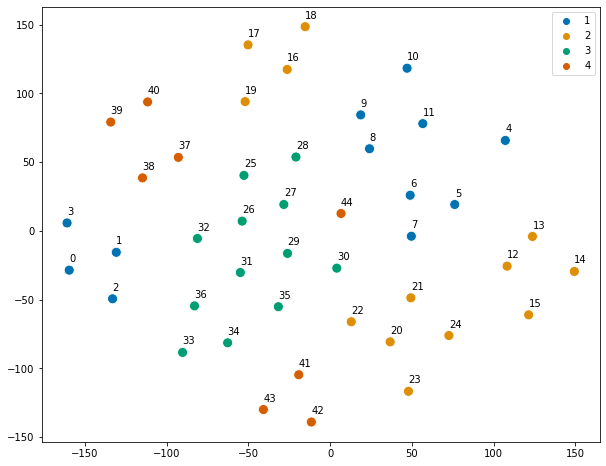

In [26]:
# without cleaning 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)


from sklearn.manifold import TSNE
# call TSNE() to fit the data

tsne = TSNE(n_components=2, verbose=1, random_state=64)
Xt = tsne.fit_transform(X)

import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(10,8))

hue = [1] * 12 + [2] * 13 + [3] * 12 + [4] * 8

sns.scatterplot(Xt[:,0], Xt[:,1], data=Xt, hue = hue, palette="colorblind", s=100)
for i, val in enumerate(Xt):
    plt.annotate(i, (val[0], val[1] + 6))

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  


A high-dimensional data visualization technique is called t-SNE. By transforming similarities between data points to joint probabilities, it aims to decrease the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

By dividing high-dimensional document vectors into two dimensions and using probability distributions from both the original dimensionality and the decomposed dimensionality, t-SNE effectively clusters related documents.



T-SNE can group documents belonging to the same category together. Four sorts of papers were included in the aforementioned categorisation. 1. Disease 2. Data Science 3. Sports 4. Music 5.Data Science. Each category had between 10 and 12 items. Each hue in the aforementioned plot stands for a specific category.

# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [28]:
# Import the data.csv only use 'text' and 'target' columns
df = pd.read_csv("C:\\Datasets\\data.csv",header = 0, usecols=[3,4])
print("Shape of Dataset: ", df.shape)
# data

# and printout the train.shape and validation.shape 

# expected shape of dataset is (7613, 2)

Shape of Dataset:  (7613, 2)


In [29]:
# clean the text in the dataframe using the clean_text function provided above
df['text'] = df['text'].apply(clean_text)


In [30]:
# initialise count vectorizer from sklearn module with default parameter
cv = CountVectorizer()
# fit and transform on dataset
X_cv = cv.fit_transform(df['text'])
X_cv = X_cv.toarray()

In [31]:
# get the values of target column

y = df.target.values

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [32]:
!pip3 install tensorflow

In [33]:
import tensorflow as tf
from tensorflow.keras import regularizers

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

    # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))
    
    # layer 2 : add the dense layer with 64 units and relu activation
    x = tf.keras.layers.Dense(2048, input_dim = X.shape[1] , activation = 'relu')(inp)

    # layer 3 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(.5)(x)
  
    # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(32, activation = 'tanh', kernel_regularizer=regularizers.l2(0.001))(x)

    # layer 5 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(.5)(x)

    # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(16, activation = 'tanh', kernel_regularizer=regularizers.l2(0.001))(x)

    # layer 7 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(.5)(x)

    # layer 8 : output layer with units equal to 1 and activation as sigmoid
    x = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

    # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 
    model = tf.keras.Model(inp, x)

    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics = [tf.keras.metrics.AUC(), 'accuracy'])

    return model


Epoch 1/5
381/381 [==============================] - 121s 316ms/step - loss: 0.6038 - auc: 0.8001 - accuracy: 0.7511 - val_loss: 0.5193 - val_auc: 0.8573 - val_accuracy: 0.7814
Epoch 2/5
381/381 [==============================] - 105s 276ms/step - loss: 0.4342 - auc: 0.8957 - accuracy: 0.8507 - val_loss: 0.5000 - val_auc: 0.8551 - val_accuracy: 0.8089
Epoch 3/5
381/381 [==============================] - 109s 286ms/step - loss: 0.3684 - auc: 0.9199 - accuracy: 0.8762 - val_loss: 0.5216 - val_auc: 0.8580 - val_accuracy: 0.8024
Epoch 4/5
381/381 [==============================] - 106s 278ms/step - loss: 0.3409 - auc: 0.9287 - accuracy: 0.8897 - val_loss: 0.5305 - val_auc: 0.8547 - val_accuracy: 0.8089
Epoch 5/5
381/381 [==============================] - 104s 272ms/step - loss: 0.3194 - auc: 0.9348 - accuracy: 0.8990 - val_loss: 0.5318 - val_auc: 0.8532 - val_accuracy: 0.8135


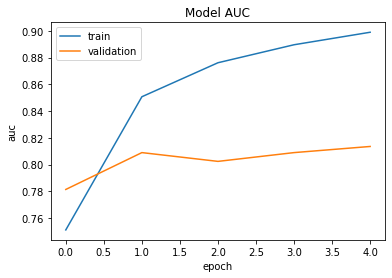

Epoch 1/5
381/381 [==============================] - 107s 280ms/step - loss: 0.5972 - auc_1: 0.8045 - accuracy: 0.7530 - val_loss: 0.4970 - val_auc_1: 0.8608 - val_accuracy: 0.8083
Epoch 2/5
381/381 [==============================] - 101s 266ms/step - loss: 0.4279 - auc_1: 0.8988 - accuracy: 0.8512 - val_loss: 0.4938 - val_auc_1: 0.8615 - val_accuracy: 0.8083
Epoch 3/5
381/381 [==============================] - 199s 524ms/step - loss: 0.3666 - auc_1: 0.9204 - accuracy: 0.8752 - val_loss: 0.5036 - val_auc_1: 0.8624 - val_accuracy: 0.8063
Epoch 4/5
381/381 [==============================] - 216s 566ms/step - loss: 0.3392 - auc_1: 0.9290 - accuracy: 0.8910 - val_loss: 0.5189 - val_auc_1: 0.8595 - val_accuracy: 0.8050
Epoch 5/5
381/381 [==============================] - 216s 568ms/step - loss: 0.3175 - auc_1: 0.9345 - accuracy: 0.8984 - val_loss: 0.5358 - val_auc_1: 0.8607 - val_accuracy: 0.8056


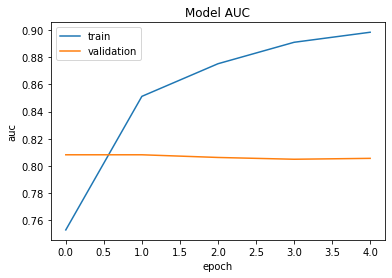

Epoch 1/5
381/381 [==============================] - 210s 535ms/step - loss: 0.6007 - auc_2: 0.8019 - accuracy: 0.7461 - val_loss: 0.5428 - val_auc_2: 0.8400 - val_accuracy: 0.7866
Epoch 2/5
381/381 [==============================] - 201s 529ms/step - loss: 0.4283 - auc_2: 0.9018 - accuracy: 0.8502 - val_loss: 0.5325 - val_auc_2: 0.8437 - val_accuracy: 0.7938
Epoch 3/5
381/381 [==============================] - 189s 495ms/step - loss: 0.3702 - auc_2: 0.9202 - accuracy: 0.8783 - val_loss: 0.5715 - val_auc_2: 0.8421 - val_accuracy: 0.7905
Epoch 4/5
381/381 [==============================] - 212s 555ms/step - loss: 0.3365 - auc_2: 0.9318 - accuracy: 0.8923 - val_loss: 0.6009 - val_auc_2: 0.8428 - val_accuracy: 0.7879
Epoch 5/5
381/381 [==============================] - 206s 539ms/step - loss: 0.3150 - auc_2: 0.9381 - accuracy: 0.9007 - val_loss: 0.5792 - val_auc_2: 0.8410 - val_accuracy: 0.7965


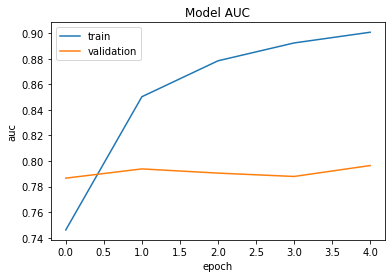

Epoch 1/5
381/381 [==============================] - 207s 531ms/step - loss: 0.6034 - auc_3: 0.8037 - accuracy: 0.7496 - val_loss: 0.5222 - val_auc_3: 0.8541 - val_accuracy: 0.8029
Epoch 2/5
381/381 [==============================] - 210s 551ms/step - loss: 0.4336 - auc_3: 0.8974 - accuracy: 0.8501 - val_loss: 0.5246 - val_auc_3: 0.8528 - val_accuracy: 0.8035
Epoch 3/5
381/381 [==============================] - 211s 554ms/step - loss: 0.3710 - auc_3: 0.9211 - accuracy: 0.8760 - val_loss: 0.5040 - val_auc_3: 0.8565 - val_accuracy: 0.8075
Epoch 4/5
381/381 [==============================] - 209s 550ms/step - loss: 0.3413 - auc_3: 0.9295 - accuracy: 0.8889 - val_loss: 0.5300 - val_auc_3: 0.8579 - val_accuracy: 0.8088
Epoch 5/5
381/381 [==============================] - 207s 544ms/step - loss: 0.3183 - auc_3: 0.9368 - accuracy: 0.8979 - val_loss: 0.5335 - val_auc_3: 0.8564 - val_accuracy: 0.8068


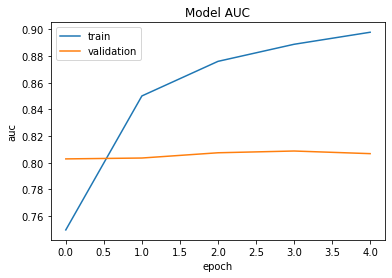

Epoch 1/5
381/381 [==============================] - 222s 569ms/step - loss: 0.6029 - auc_4: 0.7976 - accuracy: 0.7445 - val_loss: 0.5132 - val_auc_4: 0.8570 - val_accuracy: 0.7983
Epoch 2/5
381/381 [==============================] - 202s 531ms/step - loss: 0.4250 - auc_4: 0.9012 - accuracy: 0.8508 - val_loss: 0.5076 - val_auc_4: 0.8589 - val_accuracy: 0.8003
Epoch 3/5
381/381 [==============================] - 199s 523ms/step - loss: 0.3728 - auc_4: 0.9185 - accuracy: 0.8767 - val_loss: 0.5234 - val_auc_4: 0.8574 - val_accuracy: 0.8029
Epoch 4/5
381/381 [==============================] - 209s 549ms/step - loss: 0.3376 - auc_4: 0.9305 - accuracy: 0.8895 - val_loss: 0.5199 - val_auc_4: 0.8565 - val_accuracy: 0.8114
Epoch 5/5
381/381 [==============================] - 198s 521ms/step - loss: 0.3144 - auc_4: 0.9379 - accuracy: 0.8984 - val_loss: 0.5262 - val_auc_4: 0.8578 - val_accuracy: 0.8042


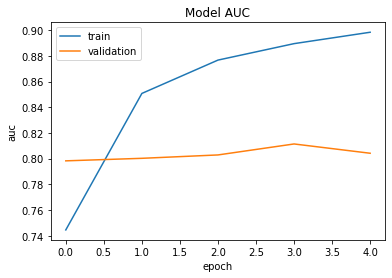

In [34]:
# Now we will initialise the stratified K-Fold from sklearn with nsplits as 5
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Now Split the countvectors and target (y)
splits = skf.split(X_cv, y)

# iterate through the train and valid index in splits for 5 folds
for train, valid in splits:

  # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X_cv[train], X_cv[valid]
    y_train, y_valid = y[train], y[valid]
  
  #call the build_model function and initialize the model
    model = build_model(X_train)

  # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
  # adjust batch size according to your computation power (suggestion use : 16)
    history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_data=(X_valid, y_valid))
    # plot the graph between training auc and validation auc
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model AUC')
    plt.ylabel('auc')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
  

  


### Q) Comment on the plots. How did it varied across different folds for neural networks?


We can observe from the loss plot that the model performs similarly on the train dataset and the validation dataset. It might be a sign to terminate training at a previous epoch if these parallel plots begin to diverge consistently. As a result, each epoch saw a significant rise in the values of accuracy, area under the curve, precision, and recall. 

# Building Multinomial Navie Bayes on Countvectors

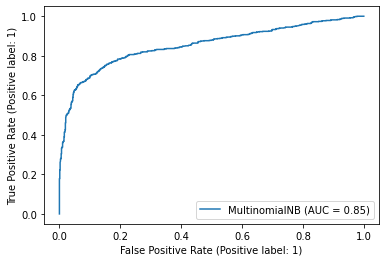

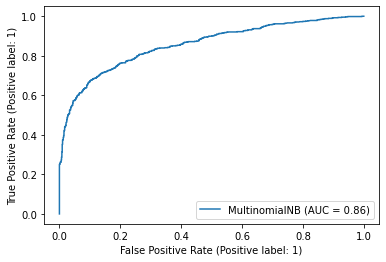

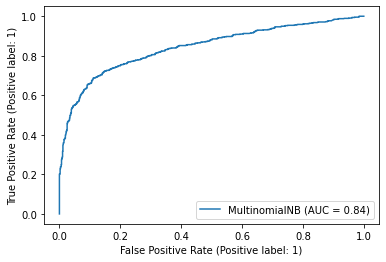

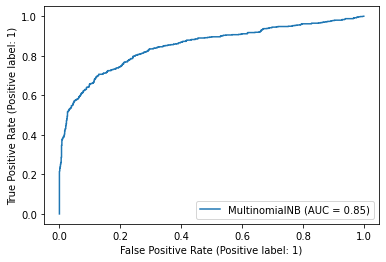

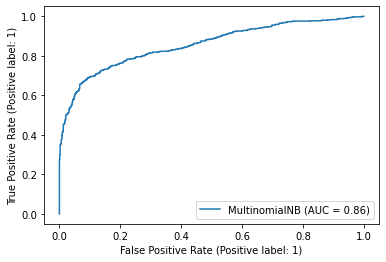

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_roc_curve


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Now Split the countvectors and target 👍
splits = skf.split(X_cv, y)

# iterate through the train and valid index in splits for 5 folds. Use the splits created above.
for trainNb, validNb in splits:
  # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X_cv[trainNb], X_cv[validNb]
    y_train, y_valid = y[trainNb], y[validNb]
  # intialise multinomial navie bayes with default parameters
    model = MultinomialNB()
  
  # fit the data
    model.fit(X_train,y_train)
    plot_roc_curve(model,X_valid,y_valid)

  # plot AUC-ROC curve for validation data
  

### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

*CountVectorizer:*

It is used to turn a given text into a vector based on the number of times (count) that each word appears across the full text. This is useful when we have several of these texts and want to turn each word into a vector (for use in further text analysis). Each text sample from the document is represented by a row in the matrix that is created by CountVectorizer, and each unique word is represented by a column of the matrix. TfidfVectorizer is what we utilize to get around this.

*TfidfVectorizer:*

Here, we take into account a word's entire document weight. It aids us in navigating the most common words. We can punish them with it. The word counts are weighted by a measure of how frequently they appear in the manuscript by TfidfVectorizer. It is a system of rating words that determines how significant a word is to a piece of writing. In order to successfully exclude common terms, TF-IDF highlights unusual words. Although it is technically far more elegant than setting hard cutoff thresholds, it is closely related to frequency-based filters.

*Word2Vec:*

For a neural network, texts are used as training data. Words that appear in comparable situations are captured by the ensuing embedding. It computes word embeddings depending on the context of the words using tiny neural networks. There are two ways to carry out this strategy. First, there is what is known as the continuous bag of words (CBOW). This strategy uses a neural network to determine which word, given the context, is most likely. It is possible to view words as having a common dimension if they are equally likely to appear. This method forecasts a comparable chance for both if we can swap out "cat" for "dog" in a sentence. We conclude that these words have comparable meanings on at least one level as a result. Skip-gram is the second strategy.The concept is extremely similar, except the network operates in the reverse direction.  

*Glove:*

It emphasizes word co-occurrences over the entire text. The likelihood that two words will appear together are related by its embeddings. It stresses the importance of knowing the frequency of co-occurrences and discourages using them as extra training examples. Instead, GloVe creates word embeddings so that a grouping of word vectors directly connects to the likelihood that these words will occur together in the corpus. In contrast to Word2Vec, the GloVe is not a trained model. Instead, its embeddings can be seen as a low-dimensional summary of the training corpus that highlights co-occurrences.

Although tf-idf is a straightforward scoring technique, which is its main feature, from a practical usage perspective, word embeddings may be a preferable option for most projects where tf-idf is utilized, especially where the job may benefit from the semantic similarity recorded by word embeddings.

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

*Bag of Words:*

An easy way to manage text data is by using Bag-of-Words. It functions in accordance with the word frequency score. By using this technique, a written document is converted into a collection of vectors that represent the number of times each word appears in the text. The disadvantage of this approach is that it masks the semantic meaning of the words. For instance, "not bad" and "decent" or "good" are semantically comparable. Separately, however, the terms "not" and "bad" arouse dislike. The feature space can be reduced using a variety of text processing techniques, such as stopword removal, stemming, etc. Bag-of-words has a disadvantage, though, in that it favors terms in the first stage solely based on counts. To get around this, the TF-IDF approach is presented as a straightforward variant of bag-of-words.


*TF-IDF:*

Both the more significant words and the less significant ones are covered. Each word count is normalized by dividing it by the number of documents in which the word appears. The total number of documents is "N." Inverse document frequency is defined as (N / (# of documents in which word w appears)). The fundamental tenet of this method is that a word's inverse document frequency is 1 if it appears in all documents. In the same way, if a term only appears in a small number of documents, its inverse document frequency will be substantially larger than 1. In comparison to setting hard cutoff thresholds, it is mathematically far more elegant and is strongly related to frequency-based filters. It is crucial to employ various feature reduction techniques, such as stemming, part-of-speech, etc., when modeling an algorithm on the TF-IDF feature space in order to achieve an effective outcome. In machine learning models, TF-IDF hence works better and is more effective.